# Social License to Operate Triple-Bottom-Line Topic Classification
## Project Demonstration

### Vision:</p>

The general purpose of the project is to perform Social License to Operate Triple-Bottom-Line topic classification on Twitter data associated with various mining companies.  Social License to Operate indicates the ongoing acceptance of a company or industry’s standard business practices and operating procedures by its employees, stakeholders, and the general public (Investopedia).  Triple Bottom Line is a framework or theory that recommends that companies commit to focus on social and environmental concerns just as they do on profits (Investopedia).  We will use supervised machine learning algorithms to perform multi-class single-label classification Tweets to predict whether their topic of discussion corresponds to social, environmental, or economic concerns.</p>

### This demonstrates the use of the Scikit-Learn Multinomial Naive Bayes Classifier.

Note: For the purposes of this demo, we are just training, predicting, and visualizating the results on one iteration of the Classifier.

Note 2: Slightly older version of my codebase, before I implemented cross-validation metrics.

#### Demonstration Codebase:

DEBUG:root:The optimal parameters found for the Multinomial Naive Bayes Classifier is:
DEBUG:root:clf__alpha: 0.9
DEBUG:root:tfidf__use_idf: False
DEBUG:root:vect__ngram_range: (1, 1)
DEBUG:root:

DEBUG:root:Accuracy using Multinomial Naive Bayes Classifier Grid Search is: 
DEBUG:root:0.5434782608695652
DEBUG:root:

DEBUG:root:

DEBUG:root:Accuracy for test set predictions using Multinomial Naive Bayes Classifier:
DEBUG:root:0.42391304347826086
DEBUG:root:

DEBUG:root:Multinomial Naive Bayes Classifier Metrics
d:\dropbox\cs344-ai\venv3.6-64bit\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
DEBUG:root:               precision    recall  f1-score   support

     economic       0.00      0.00      0.00        26
environmental       0.00      0.00      0.00        27
       social       0.42      1.00      0.60    

<Figure size 5760x3240 with 0 Axes>

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


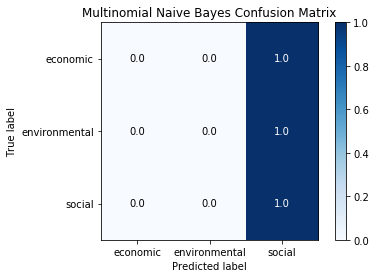

<Figure size 5760x3240 with 0 Axes>

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


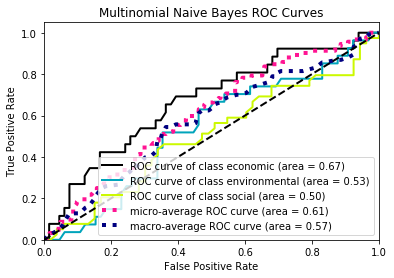

<Figure size 5760x3240 with 0 Axes>

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


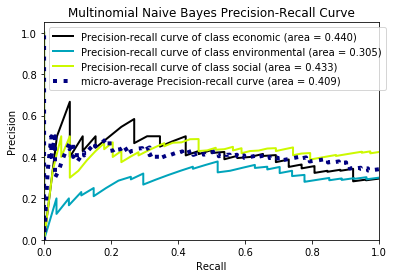

<Figure size 5760x3240 with 0 Axes>

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


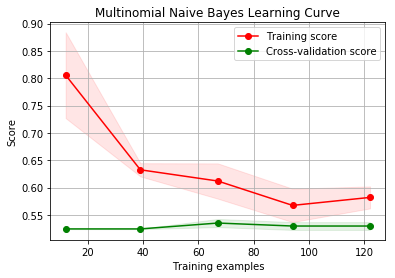

DEBUG:root:Multinomial Naive Bayes Classifier:
DEBUG:root:Mean accuracy over 1 iterations is: 0.42391304347826086
DEBUG:root:

DEBUG:root:Prediction statistics using Multinomial Naive Bayes Classifier:
DEBUG:root:The number of Tweets identified as social is :654346
DEBUG:root:The % of Tweets identified as social in the entire dataset is: 99.29649064769599
DEBUG:root:The number of Tweets identified as economic is :4636
DEBUG:root:The % of Tweets identified as economic in the entire dataset is: 0.7035093523040082
DEBUG:root:The number of Tweets identified as environmental is :0
DEBUG:root:The % of Tweets identified as environmental in the entire dataset is: 0.0
DEBUG:root:



In [6]:
"""
Course: CS 344 - Artificial Intelligence
Instructor: Professor VanderLinden
Name: Joseph Jinn
Date: 5-5-19

Final Project - SLO TBL Topic Classification

###########################################################
Notes:

This file is intended to demonstrate our work using Scikit-Learn Classifiers.

TODO - resolve SettingWithCopyWarning.

###########################################################
Resources Used:

https://scikit-plot.readthedocs.io/en/stable/index.html
(visualizations simplified)

"""

################################################################################################################
################################################################################################################

import logging as log
import warnings
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.pipeline import Pipeline
from sklearn import metrics

#############################################################

# Note: FIXME - indicates unresolved import error, but still runs fine.
# noinspection PyUnresolvedReferences
from slo_tbl_preprocessor import tweet_dataset_preprocessor_1, tweet_dataset_preprocessor_2, \
    tweet_dataset_preprocessor_3

#############################################################

# Note: Need to set level AND turn on debug variables in order to see all debug output.
log.basicConfig(level=log.DEBUG)
tf.logging.set_verbosity(tf.logging.ERROR)

# Miscellaneous parameter adjustments for pandas and python.
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

# Turn on and off to debug various sub-sections.
debug = False
debug_pipeline = False
debug_preprocess_tweets = False
debug_train_test_set_creation = False
debug_classifier_iterations = True
debug_create_prediction_set = False
debug_make_predictions = False

################################################################################################################
################################################################################################################

# Import the datasets.
tweet_dataset_processed1 = \
    pd.read_csv("preprocessed-datasets/tbl_kvlinden_PROCESSED.csv", sep=",")

tweet_dataset_processed2 = \
    pd.read_csv("preprocessed-datasets/tbl_training_set_PROCESSED.csv", sep=",")

# Reindex and shuffle the data randomly.
tweet_dataset_processed1 = tweet_dataset_processed1.reindex(
    pd.np.random.permutation(tweet_dataset_processed1.index))

tweet_dataset_processed2 = tweet_dataset_processed2.reindex(
    pd.np.random.permutation(tweet_dataset_processed2.index))

# Generate a Pandas dataframe.
tweet_dataframe_processed1 = pd.DataFrame(tweet_dataset_processed1)
tweet_dataframe_processed2 = pd.DataFrame(tweet_dataset_processed2)

if debug_preprocess_tweets:
    # Print shape and column names.
    log.debug("\n")
    log.debug("The shape of our SLO dataframe 1:")
    log.debug(tweet_dataframe_processed1.shape)
    log.debug("\n")
    log.debug("The columns of our SLO dataframe 1:")
    log.debug(tweet_dataframe_processed1.head)
    log.debug("\n")
    # Print shape and column names.
    log.debug("\n")
    log.debug("The shape of our SLO dataframe 2:")
    log.debug(tweet_dataframe_processed2.shape)
    log.debug("\n")
    log.debug("The columns of our SLO dataframe 2:")
    log.debug(tweet_dataframe_processed2.head)
    log.debug("\n")

# Concatenate the individual datasets together.
frames = [tweet_dataframe_processed1, tweet_dataframe_processed2]
slo_dataframe_combined = pd.concat(frames, ignore_index=True)

# Reindex everything.
slo_dataframe_combined.index = pd.RangeIndex(len(slo_dataframe_combined.index))
# slo_dataframe_combined.index = range(len(slo_dataframe_combined.index))

# Assign column names.
tweet_dataframe_processed_column_names = ['Tweet', 'SLO']

# Create input features.
selected_features = slo_dataframe_combined[tweet_dataframe_processed_column_names]
processed_features = selected_features.copy()

if debug_preprocess_tweets:
    # Check what we are using as inputs.
    log.debug("\n")
    log.debug("The Tweets in our input feature:")
    log.debug(processed_features['Tweet'])
    log.debug("\n")
    log.debug("SLO TBL topic classification label for each Tweet:")
    log.debug(processed_features['SLO'])
    log.debug("\n")

# Create feature set and target sets.
slo_feature_set = processed_features['Tweet']
slo_target_set = processed_features['SLO']


#######################################################
def create_training_and_test_set():
    """
    This functions splits the feature and target set into training and test sets for each set.

    Note: We use this to generate a randomized training and target set in order to average our results over
    n iterations.

    random_state = rng (where rng = random number seed generator)

    :return: Nothing.  Global variables are established.
    """
    global tweet_train, tweet_test, target_train, target_test, target_train_encoded, target_test_encoded

    from sklearn.model_selection import train_test_split

    import random
    rng = random.randint(1, 1000000)
    # Split feature and target set into training and test sets for each set.
    tweet_train, tweet_test, target_train, target_test = train_test_split(slo_feature_set, slo_target_set,
                                                                          test_size=0.33,
                                                                          random_state=rng)

    if debug_train_test_set_creation:
        log.debug("Shape of tweet training set:")
        log.debug(tweet_train.data.shape)
        log.debug("Shape of tweet test set:")
        log.debug(tweet_test.data.shape)
        log.debug("Shape of target training set:")
        log.debug(target_train.data.shape)
        log.debug("Shape of target test set:")
        log.debug(target_test.data.shape)
        log.debug("\n")

    #######################################################

    # Use Sci-kit learn to encode labels into integer values - one assigned integer value per class.
    from sklearn import preprocessing

    target_label_encoder = preprocessing.LabelEncoder()
    target_train_encoded = target_label_encoder.fit_transform(target_train)
    target_test_encoded = target_label_encoder.fit_transform(target_test)

    target_train_decoded = target_label_encoder.inverse_transform(target_train_encoded)
    target_test_decoded = target_label_encoder.inverse_transform(target_test_encoded)

    if debug_train_test_set_creation:
        log.debug("Encoded target training labels:")
        log.debug(target_train_encoded)
        log.debug("Decoded target training labels:")
        log.debug(target_train_decoded)
        log.debug("\n")
        log.debug("Encoded target test labels:")
        log.debug(target_test_encoded)
        log.debug("Decoded target test labels:")
        log.debug(target_test_decoded)
        log.debug("\n")

    # return [tweet_train, tweet_test, target_train, target_test, target_train_encoded, target_test_encoded]


################################################################################################################
def create_prediction_set():
    """
    Function prepares the borg-classifier dataset to be used for predictions in trained models.

    :return: the prepared dataset.
    """

    # Import the dataset.
    slo_dataset_cmu = \
        pd.read_csv("preprocessed-datasets/dataset_20100101-20180510_tok_PROCESSED.csv", sep=",")

    # Shuffle the data randomly.
    slo_dataset_cmu = slo_dataset_cmu.reindex(
        pd.np.random.permutation(slo_dataset_cmu.index))

    # Generate a Pandas dataframe.
    slo_dataframe_cmu = pd.DataFrame(slo_dataset_cmu)

    if debug_create_prediction_set:
        # Print shape and column names.
        log.debug("\n")
        log.debug("The shape of our SLO CMU dataframe:")
        log.debug(slo_dataframe_cmu.shape)
        log.debug("\n")
        log.debug("The columns of our SLO CMU dataframe:")
        log.debug(slo_dataframe_cmu.head)
        log.debug("\n")

    # Reindex everything.
    slo_dataframe_cmu.index = pd.RangeIndex(len(slo_dataframe_cmu.index))
    # slo_dataframe_cmu.index = range(len(slo_dataframe_cmu.index))

    # Create input features.
    # Note: using "filter()" - other methods seems to result in shape of (658982, ) instead of (658982, 1)
    selected_features_cmu = slo_dataframe_cmu.filter(['tweet_t'])
    processed_features_cmu = selected_features_cmu.copy()

    # Rename column.
    processed_features_cmu.columns = ['Tweets']

    if debug_create_prediction_set:
        # Print shape and column names.
        log.debug("\n")
        log.debug("The shape of our processed features:")
        log.debug(processed_features_cmu.shape)
        log.debug("\n")
        log.debug("The columns of our processed features:")
        log.debug(processed_features_cmu.head)
        log.debug("\n")

    if debug_create_prediction_set:
        # Check what we are using as inputs.
        log.debug("\n")
        log.debug("The Tweets in our input feature:")
        log.debug(processed_features_cmu['Tweets'])
        log.debug("\n")

    return processed_features_cmu


################################################################################################################
def make_predictions(trained_model):
    """
    Function makes predictions using the trained model passed as an argument.

    :param trained_model.
    :return: Nothing.
    """

    # Generate the dataset to be used for predictions.
    prediction_set = create_prediction_set()

    # Make predictions of the borg-slo-classifiers dataset.
    # Note to self: don't be an idiot and try to make predictions on the entire dataframe object instead of a column.
    predictions = trained_model.predict(prediction_set['Tweets'])

    # Store predictions in Pandas dataframe.
    results_df = pd.DataFrame(predictions)

    # Assign column names.
    results_df_column_name = ['TBL_classification']
    results_df.columns = results_df_column_name

    if debug_make_predictions:
        log.debug("The shape of our prediction results dataframe:")
        log.debug(results_df.shape)
        log.debug("\n")
        log.debug("The contents of our prediction results dataframe:")
        log.debug(results_df.head())
        log.debug("\n")

    # Count # of each classifications made.
    social_counter = 0
    economic_counter = 0
    environmental_counter = 0

    for index in results_df.index:
        if results_df['TBL_classification'][index] == 'economic':
            economic_counter += 1
        if results_df['TBL_classification'][index] == 'social':
            social_counter += 1
        if results_df['TBL_classification'][index] == 'environmental':
            environmental_counter += 1

    # Calculate percentages for each classification.
    social_percentage = (social_counter / results_df.shape[0]) * 100.0
    economic_percentage = (economic_counter / results_df.shape[0]) * 100.0
    environmental_percentage = (environmental_counter / results_df.shape[0]) * 100.0

    # Display our statistics.
    log.debug("The number of Tweets identified as social is :" + str(social_counter))
    log.debug("The % of Tweets identified as social in the entire dataset is: " + str(social_percentage))
    log.debug("The number of Tweets identified as economic is :" + str(economic_counter))
    log.debug("The % of Tweets identified as economic in the entire dataset is: " + str(economic_percentage))
    log.debug("The number of Tweets identified as environmental is :" + str(environmental_counter))
    log.debug("The % of Tweets identified as environmental in the entire dataset is: " + str(environmental_percentage))
    log.debug("\n")


################################################################################################################
def create_metric_visualizations(model, model_predictions, model_predictions_probabilities):
    """
    This function visualizes the metrics for a single iteration of predictions.

    :param model: the Scikit-Learn Classifier we are using.
    :param model_predictions: the predictions made using the trained model.
    :param model_predictions_probabilities: the predictions' probabilities made using the trained model.
    :return: Nothing.
    """

    import scikitplot as skplt

    # Plot the confusion matrix.
    plt.figure(figsize=(16, 9), dpi=360)
    # plt.figure(figsize=(3, 2), dpi=300)
    skplt.metrics.plot_confusion_matrix(target_test, model_predictions, normalize=True,
                                        title='Multinomial Naive Bayes Confusion Matrix')
    plt.show()

    # Plot the ROC curve.
    plt.figure(figsize=(16, 9), dpi=360)
    # plt.figure(figsize=(3, 2), dpi=300)
    skplt.metrics.plot_roc(target_test, model_predictions_probabilities, title='Multinomial Naive Bayes ROC Curves')
    plt.show()

    # Plot the precision and recall curve.
    plt.figure(figsize=(16, 9), dpi=360)
    # plt.figure(figsize=(3, 2), dpi=300)
    skplt.metrics.plot_precision_recall(target_test, model_predictions_probabilities,
                                        title='Multinomial Naive Bayes Precision-Recall Curve')
    plt.show()

    # Plot learning curve.
    plt.figure(figsize=(16, 9), dpi=360)
    # plt.figure(figsize=(3, 2), dpi=300)
    skplt.estimators.plot_learning_curve(model, tweet_train, target_train,
                                         title='Multinomial Naive Bayes Learning Curve')
    plt.show()


################################################################################################################
def multinomial_naive_bayes_classifier_grid_search():
    """
    Function performs a exhaustive grid search to find the best hyper-parameters for use training the model.

    :return: Nothing.
    """
    from sklearn.naive_bayes import MultinomialNB

    # Create randomized training and test set using our dataset.
    create_training_and_test_set()

    multinomial_nb_clf = Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)),
    ])

    from sklearn.model_selection import GridSearchCV

    # What parameters do we search for?
    parameters = {
        'vect__ngram_range': [(1, 1), (1, 2), (1, 3), (1, 4)],
        'tfidf__use_idf': (True, False),
        'clf__alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.10],
    }

    # Perform the grid search using all cores.
    multinomial_nb_clf = GridSearchCV(multinomial_nb_clf, parameters, cv=5, iid=False, n_jobs=-1)

    # Train and predict on optimal parameters found by Grid Search.
    multinomial_nb_clf.fit(tweet_train, target_train)
    multinomial_nb_predictions = multinomial_nb_clf.predict(tweet_test)

    if debug_pipeline:
        # View all the information stored in the model after training it.
        classifier_results = pd.DataFrame(multinomial_nb_clf.cv_results_)
        log.debug("The shape of the Multinomial Naive Bayes Classifier model's result data structure is:")
        log.debug(classifier_results.shape)
        log.debug("The contents of the Multinomial Naive Bayes Classifier model's result data structure is:")
        log.debug(classifier_results.head())

    # Display the optimal parameters.
    log.debug("The optimal parameters found for the Multinomial Naive Bayes Classifier is:")
    for param_name in sorted(parameters.keys()):
        log.debug("%s: %r" % (param_name, multinomial_nb_clf.best_params_[param_name]))
    log.debug("\n")

    # Display the accuracy we obtained using the optimal parameters.
    log.debug("Accuracy using Multinomial Naive Bayes Classifier Grid Search is: ")
    log.debug(np.mean(multinomial_nb_predictions == target_test))
    log.debug("\n")


################################################################################################################
def multinomial_naive_bayes_classifier():
    """
    Functions trains a Multinomial Naive Bayes Classifier.

    :return: none.
    """
    from sklearn.naive_bayes import MultinomialNB

    multinomial_nb_clf = Pipeline([
        ('vect', CountVectorizer(ngram_range=(1, 1))),
        ('tfidf', TfidfTransformer(use_idf=False)),
        ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)),
    ])

    # Predict n iterations and calculate mean accuracy.
    mean_accuracy = 0.0
    iterations = 1  # Limited to 1 iteration for demonstration and visualization purposes.
    for index in range(0, iterations):

        # Create randomized training and test set using our dataset.
        create_training_and_test_set()

        multinomial_nb_clf.fit(tweet_train, target_train)
        multinomial_nb_predictions = multinomial_nb_clf.predict(tweet_test)
        multinomial_nb_predictions_probabilities = multinomial_nb_clf.predict_proba(tweet_test)

        # Calculate the accuracy of our predictions.
        accuracy = np.mean(multinomial_nb_predictions == target_test)

        if debug_classifier_iterations:
            # Measure accuracy.
            log.debug("\n")
            log.debug("Accuracy for test set predictions using Multinomial Naive Bayes Classifier:")
            log.debug(str(accuracy))
            log.debug("\n")

            log.debug("Multinomial Naive Bayes Classifier Metrics")
            log.debug(metrics.classification_report(target_test, multinomial_nb_predictions,
                                                    target_names=['economic', 'environmental', 'social']))

            log.debug("Multinomial Naive Bayes Classifier confusion matrix:")
            log.debug(metrics.confusion_matrix(target_test, multinomial_nb_predictions))

        mean_accuracy += accuracy

        # Create various visualizations of our trained model's metrics.
        create_metric_visualizations(multinomial_nb_clf,
                                     multinomial_nb_predictions, multinomial_nb_predictions_probabilities)

    mean_accuracy = mean_accuracy / iterations
    log.debug("Multinomial Naive Bayes Classifier:")
    log.debug("Mean accuracy over " + str(iterations) + " iterations is: " + str(mean_accuracy))
    log.debug("\n")

    # Make predictions using trained model.
    log.debug("Prediction statistics using Multinomial Naive Bayes Classifier:")
    make_predictions(multinomial_nb_clf)


################################################################################################################
############################################################################################
"""
Main function.  Executes the demonstration.
"""
import time

if __name__ == '__main__':

    # For debug purposes.
    # my_set = create_prediction_set()

    start_time = time.time()

    ################################################
    """
    This section calls grid search functions for automated hyper parameter tuning.
    """
    multinomial_naive_bayes_classifier_grid_search()

    ################################################
    """
    This section calls Scikit-Learn classifer functions for model training and prediction.
    """
    multinomial_naive_bayes_classifier()

    ################################################

    end_time = time.time()

    if debug_pipeline:
        log.debug("The time taken to train the classifier, make predictions, and visualize the results is:")
        total_time = end_time - start_time
        log.debug(str(total_time) + " seconds")
        log.debug("\n")

############################################################################################
